Based on example - https://colab.research.google.com/drive/1e9o2NB2GDDjadptGr3rwQwTcw-IrFOnm#scrollTo=8ECZccyTMMZX

In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

## Verify that Notebook is playing back audio correctly

/home/ec2-user/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


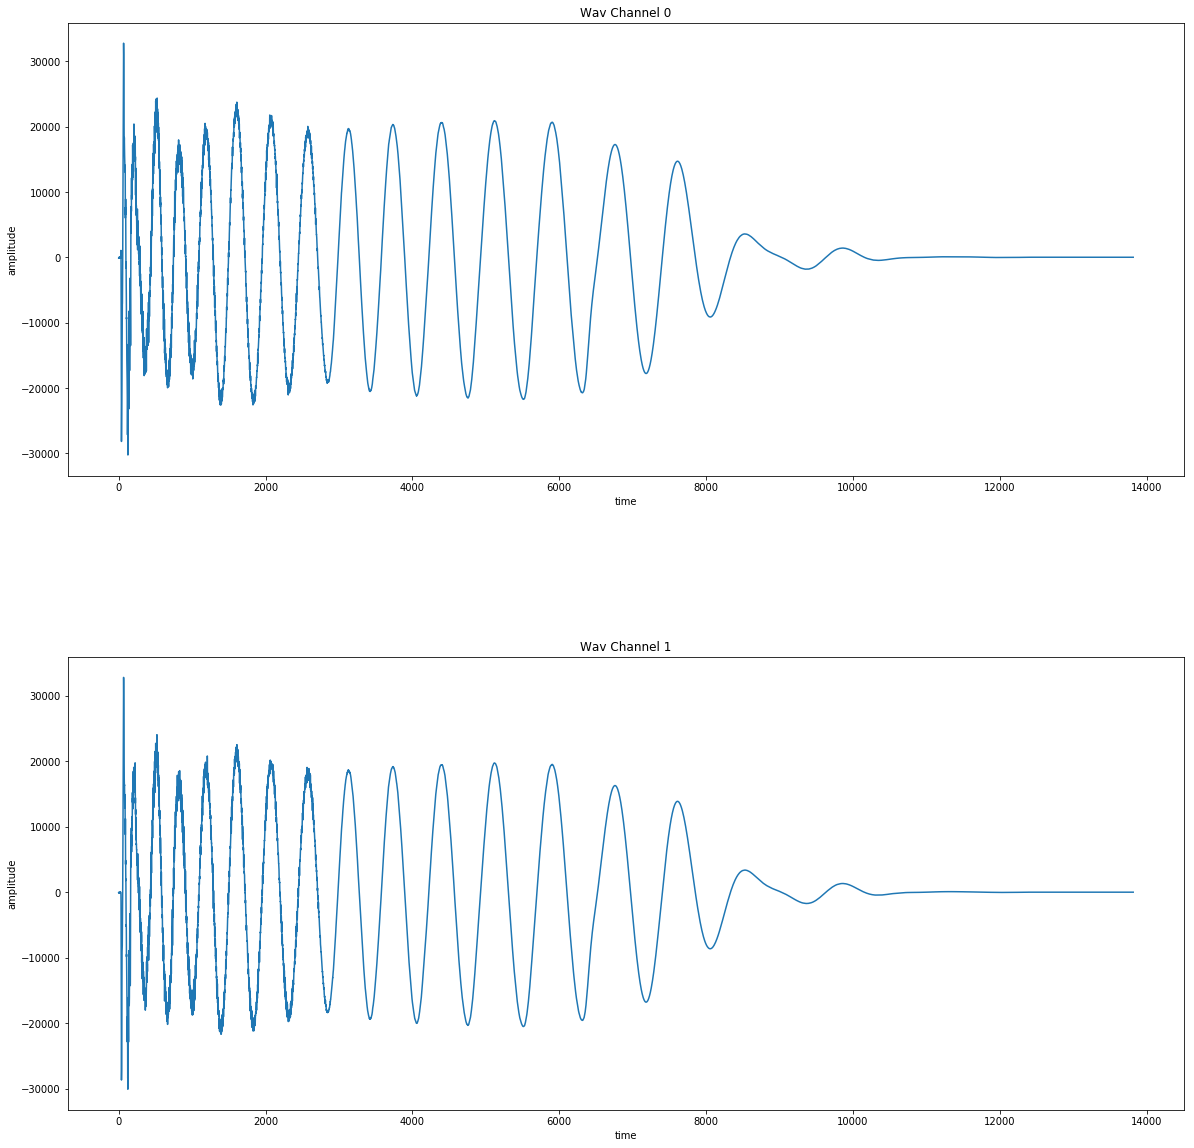

In [2]:
import IPython.display as ipd

#path to file
filePath = '/capstone/project/kick_drums/'
file = 'VEE Bassdrum 000.wav'

#read in file
wav = wavfile.read(filePath+file)

#look at wav file
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(wav[1][:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('Wav Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    
#play file
#have to rerun cell each time want to play
#correct sound. If keep hitting play wo
#rerunning cell it doesn't play full sample
ipd.Audio(filePath+file)

#test export
wavfile.write('testKick.wav',rate=16000,data=wav[1])

## Model trained on our samples

In [3]:
# Load the model
import tensorflow as tf

tf.reset_default_graph()
saver = tf.train.import_meta_graph('/capstone/project/models/kickdrum2/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, '/capstone/project/models/kickdrum2/model.ckpt-527')

INFO:tensorflow:Restoring parameters from /capstone/project/models/kickdrum2/model.ckpt-527


Finished! (Took 1.1711513996124268 seconds)
--------------------------------------------------------------------------------
Example 0


--------------------------------------------------------------------------------
Example 1


--------------------------------------------------------------------------------
Example 2


--------------------------------------------------------------------------------
Example 3


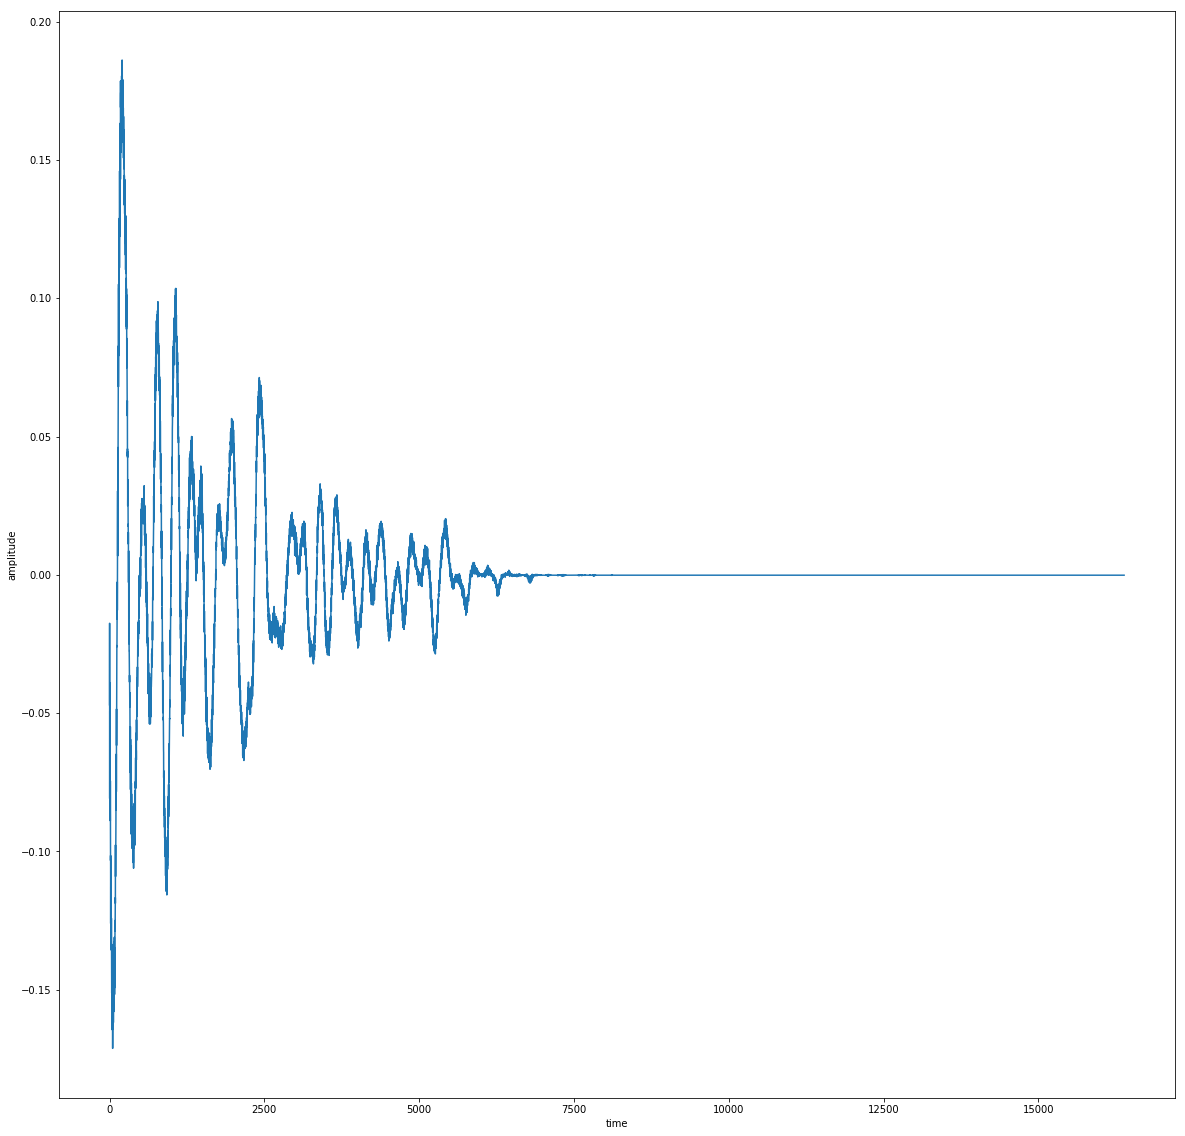

In [4]:
# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 16
ndisplay = 4

import numpy as np
import PIL.Image
from IPython.display import display, Audio
import time as time

#start time
start = time.time()

# Sample latent vectors - from collab nb
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Sample latent vectors from code base
# #tensor that defines how many latent vectors to sample
# z_n = graph.get_tensor_by_name('samp_z_n:0')

# #tensor that creates z_n latent vectors
# _z = sess.run(graph.get_tensor_by_name('samp_z:0'), {z_n: 10})

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
#G_z_spec = graph.get_tensor_by_name('G_z_spec:0') - this is just for image

start = time.time()
_G_z = sess.run(G_z, {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
plt.plot(_G_z[0])
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('GANKick.wav',rate=16000,data=_G_z[0])

for i in range(ndisplay):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# apply a butterfield (low pass filter)
# to clean up the sound wave/signal
def butterfield_test(s):
    fs = 1000  # Sampling frequency
    # Generate the time vector properly
    t = np.arange(1000) / fs
    signala = np.sin(2*np.pi*100*t) # with frequency of 100
    plt.plot(t, signala, label='a')

    signalb = np.sin(2*np.pi*20*t) # frequency 20
    plt.plot(t, signalb, label='b')

    signalc = signala + signalb
    plt.plot(t, signalc, label='c')

    fc = 30  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(5, w, 'low')
    output = signal.filtfilt(b, a, signalc)
    plt.plot(t, output, label='filtered')
    plt.legend()
    plt.show()
    
    return output

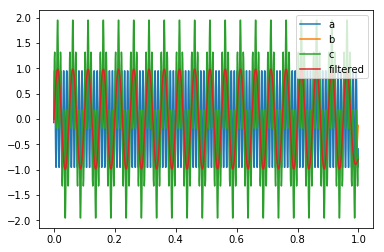

In [11]:
z_filtered = butterfield_test(_G_z[0])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# apply a butterfield (low pass filter)
# to clean up the sound wave/signal
def apply_butterfield(sig, order, nyquest_rate):
#    t = np.arange(1000) / sampling_freq
#    w = cutoff / (sampling_freq / 2) # Normalize the frequency
#    b, a = signal.butter(5, w, 'low')
#    output = signal.filtfilt(b, a, sig)
#    plt.plot(t, output, label='filtered')
#    plt.legend()
#    plt.show()
    
    b, a = signal.butter(order, nyquest_rate)
    output = signal.filtfilt(b, a, sig, padlen=150)
    
    return output

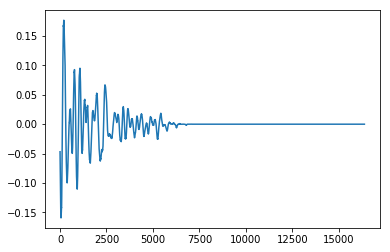

--------------------------------------------------------------------------------
Example 0


In [38]:
z_filtered = apply_butterfield(_G_z[0], 2, 0.125)

plt.plot(z_filtered)
plt.show()

for i in range(1):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(z_filtered, rate=16000))

In [ ]:
z_filtered = apply_butterfield(_G_z[0],100)
#print(type(z_clean))

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
#plt.plot(_G_z[0])
#plt.plot(z_clean)
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('GANKickClean.wav',rate=16000,data=z_clean)

for i in range(1):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))

sr, x = wavfile.read('GANKickClean.wav')
#print(x.shape)

#print(x)

#x = signal.decimate(x, 4)
#print(x.shape)
#x = x[16000*3:16000*3+4096]
#print(x.shape)
#x *= np.hamming(4096)

#X = abs(np.fft.rfft(x))
#X_db = 20 * np.log10(X)
#freqs = np.fft.rfftfreq(4096, 1/16000)
plt.plot(z_clean)
plt.show()

#wavfile.write('GANKickClean2.wav',rate=16000,data=_G_z[0])

for i in range(1):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(z_clean, rate=16000))

In [12]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return (ret[n - 1:] / n)  # multiply to address dampening of amplitude

--------------------------------------------------------------------------------
Example 0


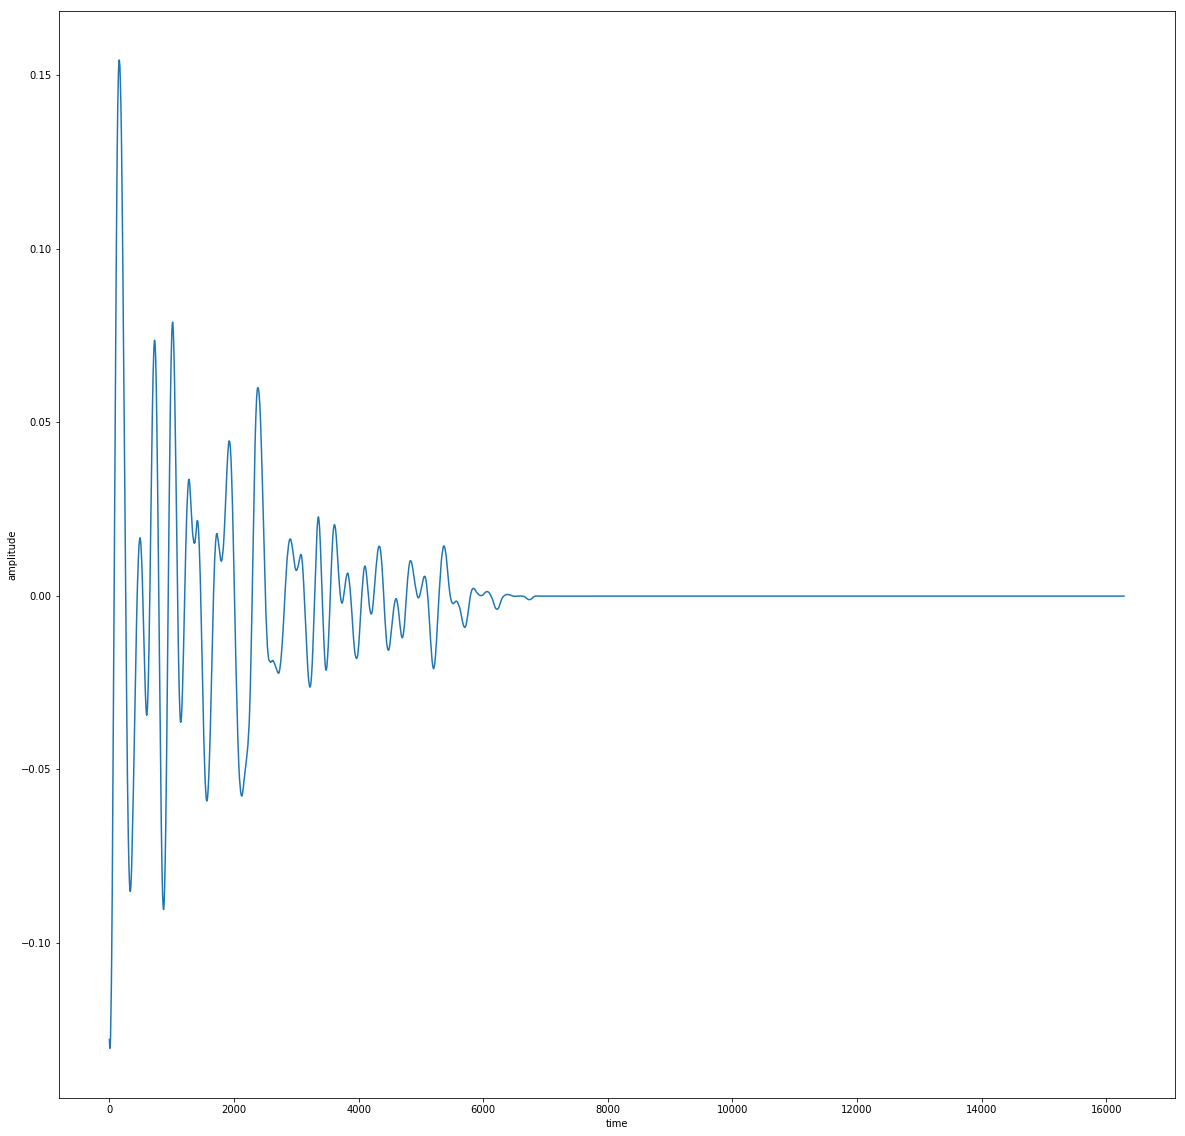

--------------------------------------------------------------------------------
Example 0


In [13]:
# testing FFT to clean the waveform

#print(type(_G_z[0]))

#print(_G_z.shape)
#for i in range((_G_z.shape)[1]):
#    print(_G_z[0][i])

z_clean = moving_average(_G_z[0],100)
#print(type(z_clean))

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
#plt.plot(_G_z[0])
#plt.plot(z_clean)
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('GANKickClean.wav',rate=16000,data=z_clean)

for i in range(1):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))

sr, x = wavfile.read('GANKickClean.wav')
#print(x.shape)

#print(x)

#x = signal.decimate(x, 4)
#print(x.shape)
#x = x[16000*3:16000*3+4096]
#print(x.shape)
#x *= np.hamming(4096)

#X = abs(np.fft.rfft(x))
#X_db = 20 * np.log10(X)
#freqs = np.fft.rfftfreq(4096, 1/16000)
plt.plot(z_clean)
plt.show()

#wavfile.write('GANKickClean2.wav',rate=16000,data=_G_z[0])

for i in range(1):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(z_clean, rate=16000))
    


## Model trained on wavGAN samples

In [32]:
# Load the model
import tensorflow as tf

tf.reset_default_graph()
saver = tf.train.import_meta_graph('/capstone/project/models/wavegan_drums/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, '/capstone/project/models/wavegan_drums/model.ckpt-714')

INFO:tensorflow:Restoring parameters from /capstone/project/models/wavegan_drums/model.ckpt-714


/home/ec2-user/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


InternalError: Dst tensor is not initialized.
	 [[{{node save/RestoreV2/_23}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_27_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Finished! (Took 4.230072021484375 seconds)
(64, 16384)
[ -1.46979928e-01   1.62717011e-02  -4.15740125e-02 ...,  -1.73809476e-05
  -4.31384797e-05  -5.13091618e-05]
--------------------------------------------------------------------------------
Example 0


--------------------------------------------------------------------------------
Example 1


--------------------------------------------------------------------------------
Example 2


--------------------------------------------------------------------------------
Example 3


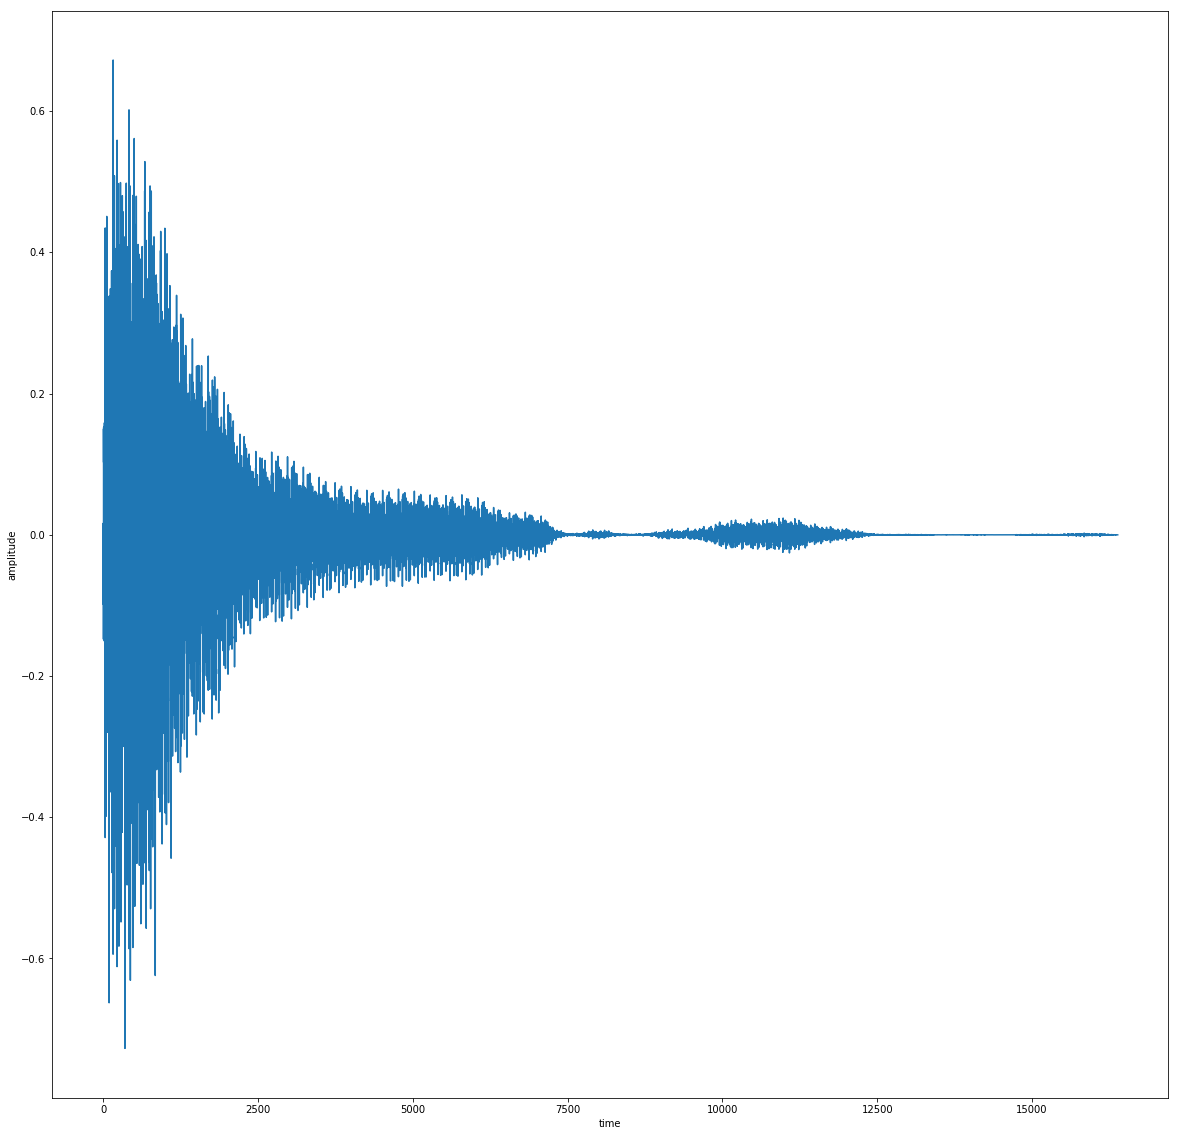

In [37]:
# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 16
ndisplay = 4

import numpy as np
import PIL.Image
from IPython.display import display, Audio
import time as time

#start time
start = time.time()

# Sample latent vectors - from collab nb
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Sample latent vectors from code base
# #tensor that defines how many latent vectors to sample
# z_n = graph.get_tensor_by_name('samp_z_n:0')

# #tensor that creates z_n latent vectors
# _z = sess.run(graph.get_tensor_by_name('samp_z:0'), {z_n: 10})

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
#G_z_spec = graph.get_tensor_by_name('G_z_spec:0') - this is just for image

start = time.time()
_G_z = sess.run(G_z, {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))
print(_G_z.shape)
print(_G_z[0])

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
plt.plot(_G_z[0])
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('ChrisGANSound.wav',rate=16000,data=_G_z[0])

for i in range(ndisplay):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))



Model trained with Open High Hat sounds

INFO:tensorflow:Restoring parameters from /capstone/project/models/hihat_open/model.ckpt-2585
Finished! (Took 0.09480071067810059 seconds)
(16, 16384)
[ 1.1636511e-02 -3.0631653e-03  8.0534564e-03 ... -4.5087738e-05
 -4.5087738e-05 -4.5087738e-05]
--------------------------------------------------------------------------------
Example 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


--------------------------------------------------------------------------------
Example 1


--------------------------------------------------------------------------------
Example 2


--------------------------------------------------------------------------------
Example 3


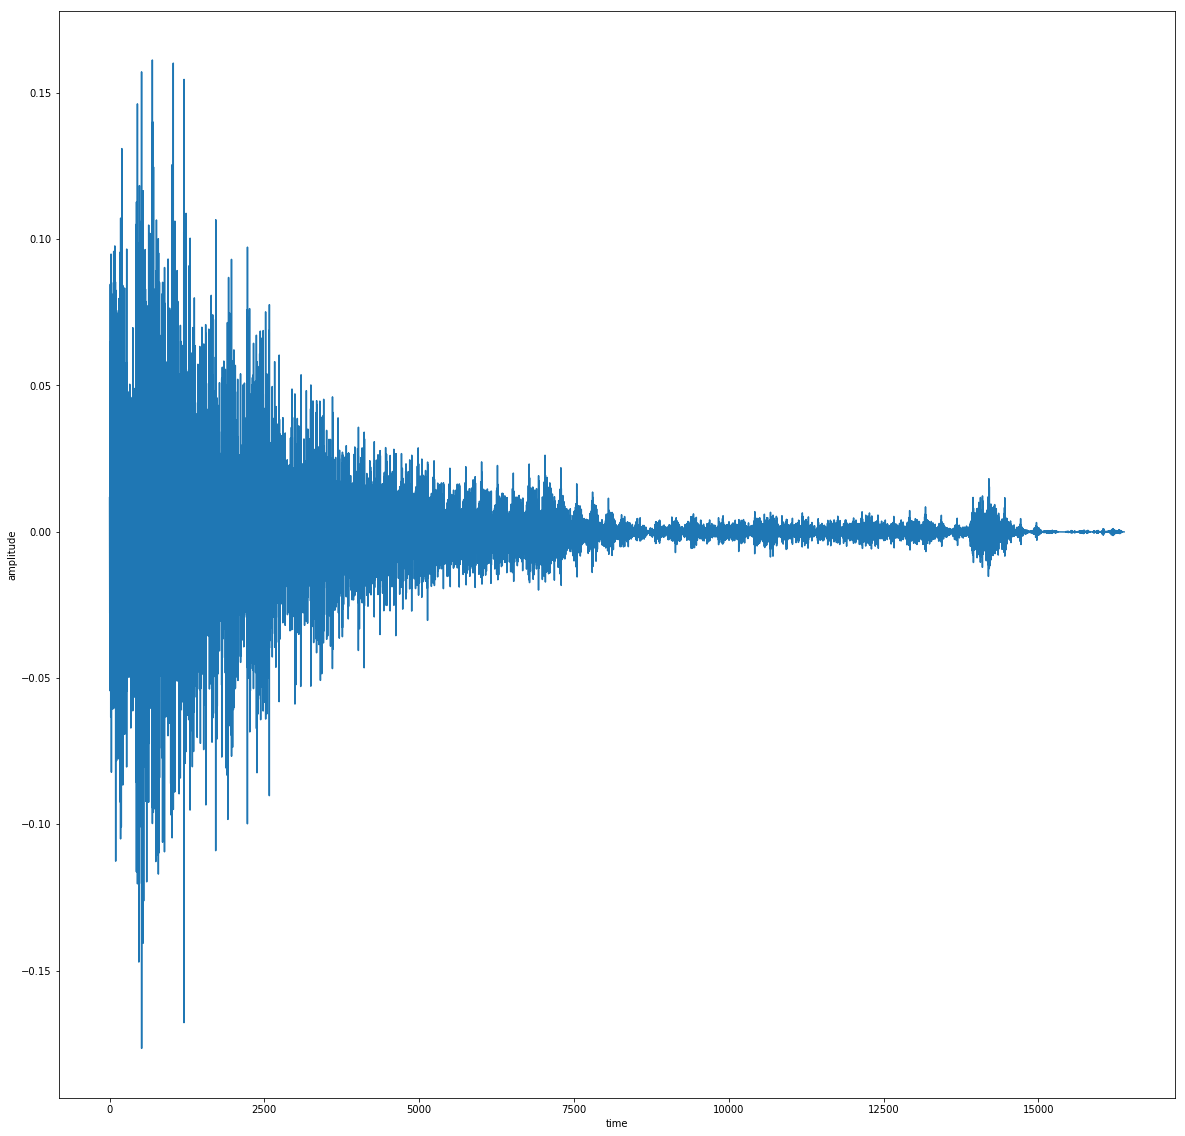

In [9]:
tf.reset_default_graph()
saver = tf.train.import_meta_graph('/capstone/project/models/hihat_open/infer/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, '/capstone/project/models/hihat_open/model.ckpt-2585')

# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 16
ndisplay = 4

#start time
start = time.time()

# Sample latent vectors - from collab nb
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Sample latent vectors from code base
# #tensor that defines how many latent vectors to sample
# z_n = graph.get_tensor_by_name('samp_z_n:0')

# #tensor that creates z_n latent vectors
# _z = sess.run(graph.get_tensor_by_name('samp_z:0'), {z_n: 10})

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
#G_z_spec = graph.get_tensor_by_name('G_z_spec:0') - this is just for image

start = time.time()
_G_z = sess.run(G_z, {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))
print(_G_z.shape)
print(_G_z[0])

#plot one wav
#look at wav file
plt.figure(figsize=(20,20))
plt.plot(_G_z[0])
plt.xlabel('time')
plt.ylabel('amplitude')

#export expample
wavfile.write('GAN_HiHat.wav',rate=16000,data=_G_z[0])

for i in range(ndisplay):
    print('-' * 80)
    print('Example {}'.format(i))
    #display(PIL.Image.fromarray(_G_z_spec[i])) - this is just for image
    display(Audio(_G_z[i], rate=16000))